<a href="https://colab.research.google.com/github/WardahGul/Data-Science2/blob/main/Lab05_20SW034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB #05
Roll No#20SW034
Section : 2

Task#01

In [ ]:
import pandas as pd

distance_from_sun = [149.6, 1433.5, 227.9, 108.2, 778.6]
planets = ['Earth', 'Saturn', 'Mars', 'Venus', 'Jupiter']

dist_planets = pd.Series(distance_from_sun, index=planets)

speed_of_light = 18
time_light = dist_planets / speed_of_light

close_planets = time_light[time_light < 40]

print("Distance from the Sun:\n", dist_planets)
print("\nTime for sunlight to reach each planet:\n", time_light)
print("\nPlanets where sunlight takes less than 40 minutes:\n", close_planets)


Distance from the Sun:
 Earth       149.6
Saturn     1433.5
Mars        227.9
Venus       108.2
Jupiter     778.6
dtype: float64

Time for sunlight to reach each planet:
 Earth       8.311111
Saturn     79.638889
Mars       12.661111
Venus       6.011111
Jupiter    43.255556
dtype: float64

Planets where sunlight takes less than 40 minutes:
 Earth     8.311111
Mars     12.661111
Venus     6.011111
dtype: float64


Task #02

In [22]:
import pandas as pd
import numpy as np
books = pd.Series(data=['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland'])
authors = pd.Series(data=['Charles Dickens', 'John Steinbeck', 'William Shakespeare', 'H. G. Wells', 'Lewis Carroll'])
user_1 = pd.Series(data=[3.2, np.nan, 2.5])
user_2 = pd.Series(data=[5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data=[2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data=[4, 3.5, 4, 5, 4.2])
dat = {'Book Title': books,
       'Author': authors,
       'User 1': user_1,
       'User 2': user_2,
       'User 3': user_3,
       'User 4': user_4}
book_ratings = pd.DataFrame(dat)
# Fill missing values with column means
book_ratings.fillna(book_ratings.mean(), inplace=True)
# Set the precision for displaying floating-point numbers
#pd.set_option('precision', 1)
print(book_ratings)
print()
best_rated = book_ratings[(book_ratings == 5).any(axis=1)]['Book Title'].values
print(best_rated)


            Book Title               Author  User 1  User 2    User 3  User 4
0   Great Expectations      Charles Dickens    3.20   5.000  2.000000     4.0
1      Of Mice and Men       John Steinbeck    2.85   1.300  2.300000     3.5
2     Romeo and Juliet  William Shakespeare    2.50   4.000  2.766667     4.0
3     The Time Machine          H. G. Wells    2.85   3.800  4.000000     5.0
4  Alice in Wonderland        Lewis Carroll    2.85   3.525  2.766667     4.2

['Great Expectations' 'The Time Machine']


<ipython-input-22-83fb01561afa>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  book_ratings.fillna(book_ratings.mean(), inplace=True)


Task #03

mean:
  google_stock    347.420229
apple_stock      35.222976
amazon_stock    166.095436
dtype: float64

median:
  google_stock    286.397247
apple_stock      17.524017
amazon_stock     76.980003
dtype: float64

std:
  google_stock    187.671596
apple_stock      37.945557
amazon_stock    189.212345
dtype: float64

corr:
               google_stock  apple_stock  amazon_stock
google_stock      1.000000     0.900242      0.952444
apple_stock       0.900242     1.000000      0.906296
amazon_stock      0.952444     0.906296      1.000000
2000-01-01           NaN
2000-01-02           NaN
2000-01-03           NaN
2000-01-04           NaN
2000-01-05     80.354167
                 ...    
2016-12-27           NaN
2016-12-28           NaN
2016-12-29    769.560018
2016-12-30    762.383341
2016-12-31           NaN
Freq: D, Name: amazon_stock, Length: 6210, dtype: float64


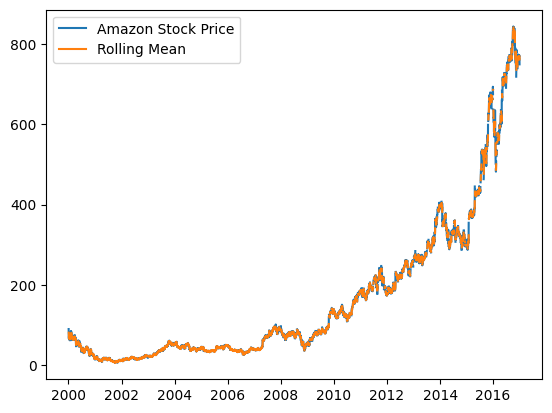

In [24]:
import pandas as pd
df = pd.read_csv('./GOOG.csv')
df.head()
google_stock = pd.read_csv('./GOOG.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
apple_stock = pd.read_csv('./AAPL.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
amazon_stock = pd.read_csv('./AMZN.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
google_stock.head()
amazon_stock.head(3)
amazon_stock.head(3)
dates = pd.date_range('2000-01-01', '2016-12-31')
all_stocks = pd.DataFrame(index = dates)
google_stock.rename(columns={'Adj Close': 'google_stock'}, inplace=True)
amazon_stock.rename(columns={'Adj Close': 'amazon_stock'}, inplace=True)
apple_stock.rename(columns={'Adj Close': 'apple_stock'}, inplace=True)
google_stock.head()
amazon_stock.head()
all_stocks = all_stocks.join(google_stock)
all_stocks = all_stocks.join(apple_stock)
all_stocks = all_stocks.join(amazon_stock)
all_stocks.head()
all_stocks.isnull()
all_stocks.dropna(axis=0)
# Print the average stock price for each stock
print('mean:\n ',all_stocks.mean(axis=0))
print()
# Print the median stock price for each stock
print('median:\n ', all_stocks.median())
print()
# Print the standard deviation of the stock price for each stock
print('std:\n ', all_stocks.std())
print()
# Print the correlation between stocks
print('corr:\n', all_stocks.corr())
rollingMean = all_stocks['amazon_stock'].rolling(3).mean()
print(rollingMean)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(all_stocks['amazon_stock'])
plt.plot(rollingMean)
plt.legend(['Amazon Stock Price', 'Rolling Mean'])
plt.show()

